In [119]:
import pandas as pd
dados = pd.read_csv("dados/aluguel_residencial.csv", sep = ";")
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,68.87,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,80.67,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,NaN,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,43.52,Apartamento
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,33.85,Apartamento
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,40.54,Apartamento
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,NaN,Apartamento


In [120]:
dados["Valor"].mean()
bairros = ['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro', "Botafogo", "Leblon"]
selecao = dados["Bairro"].isin(bairros)
dados = dados[selecao]

In [121]:
dados["Bairro"].drop_duplicates()

0          Copacabana
1     Jardim Botânico
2     Barra da Tijuca
3              Centro
16           Botafogo
25             Leblon
Name: Bairro, dtype: object

In [122]:
grupo_bairro = dados.groupby("Bairro")
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    2,     7,    20,    22,    30,    35,    41,    44,    49,
                59,
             ...
             32922, 32923, 32924, 32927, 32939, 32940, 32941, 32942, 32943,
             32952],
            dtype='int64', length=6259),
 'Botafogo': Int64Index([   16,    17,    32,    66,    83,   116,   124,   125,   164,
               182,
             ...
             32688, 32714, 32724, 32731, 32794, 32803, 32842, 32884, 32889,
             32907],
            dtype='int64', length=1377),
 'Centro': Int64Index([    3,     9,    10,    38,    45,    46,    52,    54,    72,
                86,
             ...
             32896, 32913, 32917, 32931, 32937, 32946, 32948, 32954, 32955,
             32959],
            dtype='int64', length=3258),
 'Copacabana': Int64Index([    0,    13,    14,    15,    33,    34,    39,    43,    58,
               123,
             ...
             32790, 32799, 32826, 32838, 32892, 32900, 32916, 32936, 32938,
   

In [123]:
for bairro, data in grupo_bairro:
    print(("{} - {}").format (bairro, data["Valor"].mean()))

Barra da Tijuca - 9019.593829923273
Botafogo - 19517.037900874635
Centro - 19004.972375690606
Copacabana - 4509.83453689168
Jardim Botânico - 8779.8
Leblon - 11052.345060893098


In [124]:
grupo_bairro[["Valor", "Condominio"]].mean().round(2).head(10)

,Valor,Condominio
Bairro,,
Barra da Tijuca,9019.59,3599.17
Botafogo,19517.04,3296.48
Centro,19004.97,5247.40
Copacabana,4509.83,1211.94
Jardim Botânico,8779.80,1576.12
Leblon,11052.35,2290.44


# Estatísticas descritivas

In [125]:
# Para fazer um Data Frame com as descrição dos valores (estatísticas)
grupo_bairro["Valor"].describe().round(2).head(10)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6256.0,9019.59,30192.24,100.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1372.0,19517.04,129131.61,299.0,2500.0,4000.0,11000.0,4500000.0
Centro,3258.0,19004.97,59355.76,90.0,1000.0,3705.5,15000.0,950000.0
Copacabana,3185.0,4509.83,6413.41,100.0,1900.0,3000.0,4900.0,198000.0
Jardim Botânico,350.0,8779.80,11680.25,1100.0,3000.0,4000.0,9425.0,120000.0
Leblon,1478.0,11052.35,20707.09,100.0,4500.0,7000.0,11900.0,430000.0


In [126]:
# Com o aggregate vc pode selecionar as estatísticas que vc quer. "Rename" para renomear as colunas.
grupo_bairro["Valor"].aggregate(["min", "max"]).rename(columns = {"min": "Mínimo", "max": "Máximo"})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,738197.0
Botafogo,299.0,4500000.0
Centro,90.0,950000.0
Copacabana,100.0,198000.0
Jardim Botânico,1100.0,120000.0
Leblon,100.0,430000.0


# Usando a biblioteca Matplotlib para criar gráfico

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

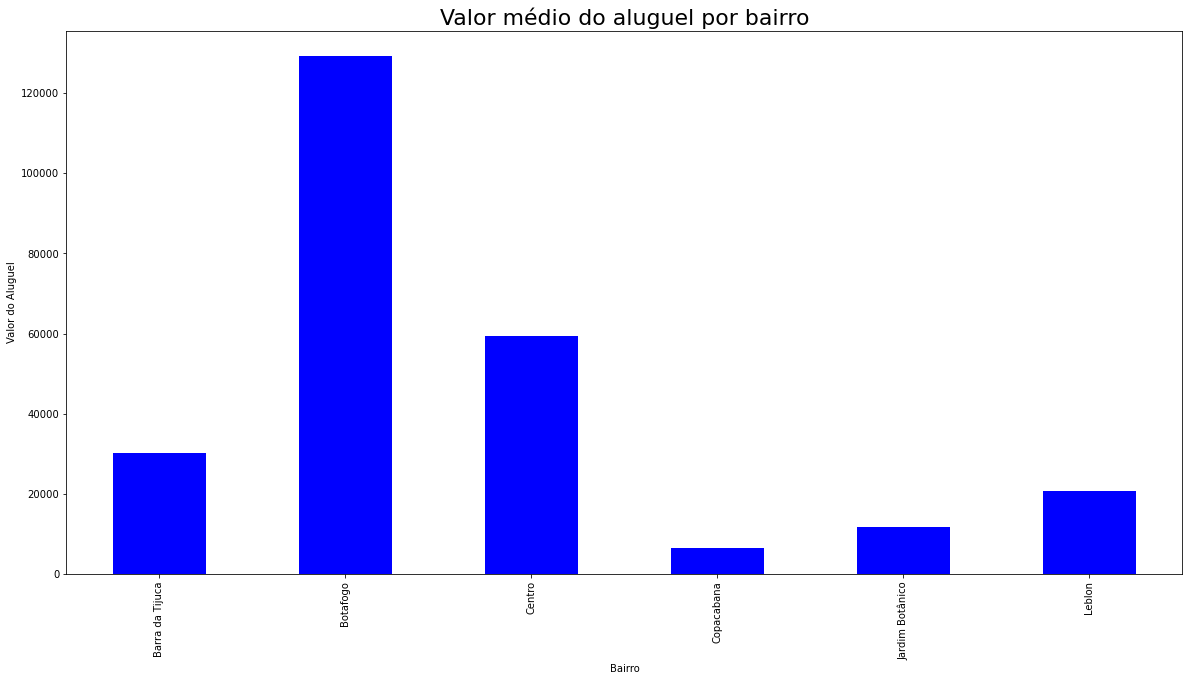

In [128]:
fig = grupo_bairro["Valor"].std().plot.bar(color = "blue")
fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor médio do aluguel por bairro", {"fontsize": 22})